In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
import json

import numpy as np

from src.optics.channel_simulation import ChannelSimulator
from src.general_methods.visualizer import Visualizer

In [39]:
# config
dir = f'../apps/deep/data/50_samples'
x_path = f'{dir}/data_x.npy'
y_path = f'{dir}/data_y.npy'
conf_path = f'{dir}/conf.json'

In [40]:
# read
with open(x_path, 'rb') as f:
    all_x_read = np.load(f)
with open(y_path, 'rb') as f:
    all_y_read = np.load(f)
with open(conf_path, 'r') as f:
    conf_read = json.load(f)

found 50 data sets, showing #3:


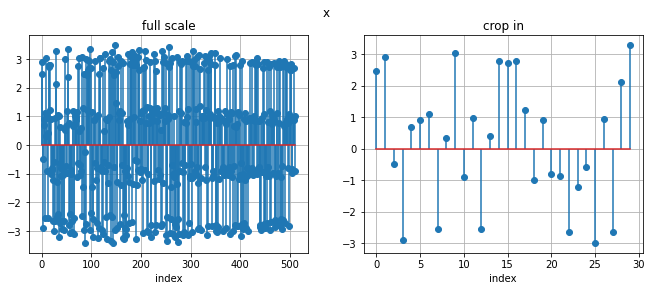

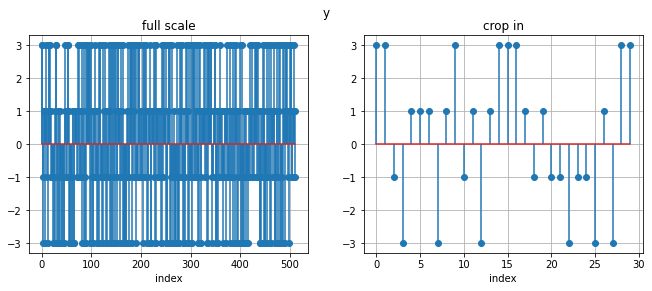

In [41]:
# visual the data
data_id = 3
print(f'found {len(all_x_read)} data sets, showing #{data_id}:')
Visualizer.twin_zoom_plot('x', np.real(all_x_read[data_id]), range(0, 30), function='stem')
Visualizer.twin_zoom_plot('y', np.real(all_y_read[data_id]), range(0, 30), function='stem')

In [42]:
# generate cs based on the config
# print(json.dumps(conf_read, indent=4))
cs = ChannelSimulator.from_dict(conf_read)
print(cs)

SSF params: N = 2359, P_0 = 0.00042666666666666667
number of iterations in split step algo: 2359
{
    "m_qam": 16,
    "num_symbols": 512,
    "normalization_factor": 0.001,
    "dt": 1,
    "ssf": {
        "b2": -2e-26,
        "gamma": 0.003,
        "t0": 1.25e-10,
        "dt": 1,
        "z_n": 1.51,
        "h": 500
    }
}


In [43]:
# calc ber for all and plot histogram
for x, y in zip(all_x_read, all_y_read):
    msg_in = cs.cb.demodulate(y, cs.modem,cs.length_of_msg)
    msg_out = cs.cb.demodulate(x, cs.modem,cs.length_of_msg)
    cs.cb.calc_ber(msg_in, msg_out, cs.length_of_msg, cs.sps)

In [50]:
y = all_y_read[3]
bits = cs.cb.demodulate(y,cs.modem,cs.length_of_msg)
Visualizer.print_bits(bits, cs.sps, 'message before channel')


_______________________________________________
message before channel - len=2048
[[1 0 0 1]
 [1 0 0 1]
 [0 1 0 1]
 ...
 [1 0 0 1]
 [1 1 0 1]
 [0 1 0 1]]


In [53]:
print(np.reshape(bits, (-1, cs.sps)))

[[1.  0.  0.5 1. ]
 [1.  0.  0.5 1. ]
 [0.  1.  0.5 1. ]
 ...
 [1.  0.  0.5 1. ]
 [1.  1.  0.5 1. ]
 [0.  1.  0.5 1. ]]
